# Lab 6
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [2]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

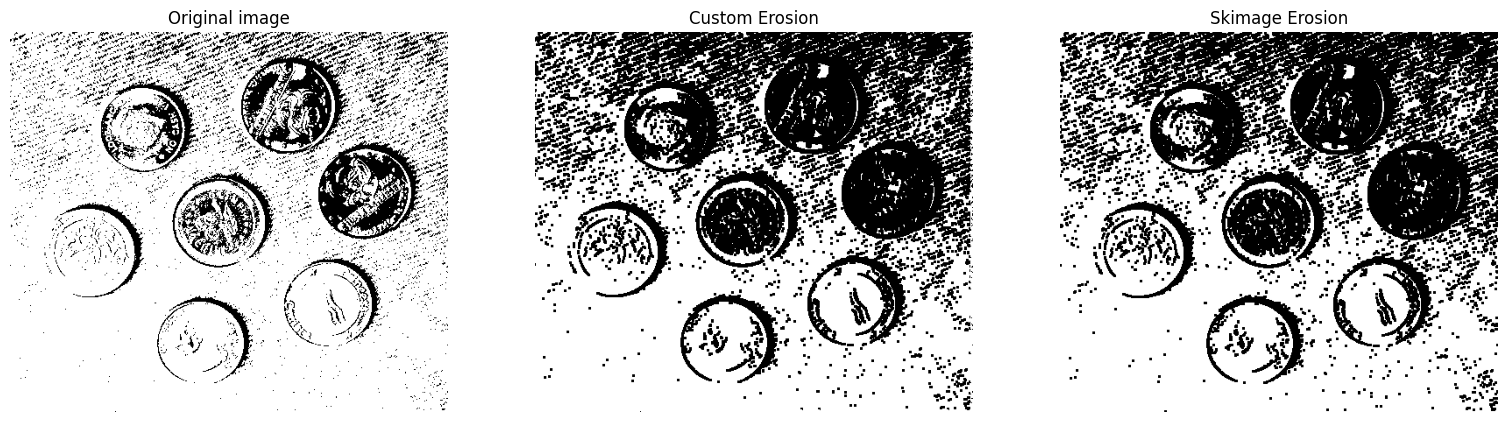

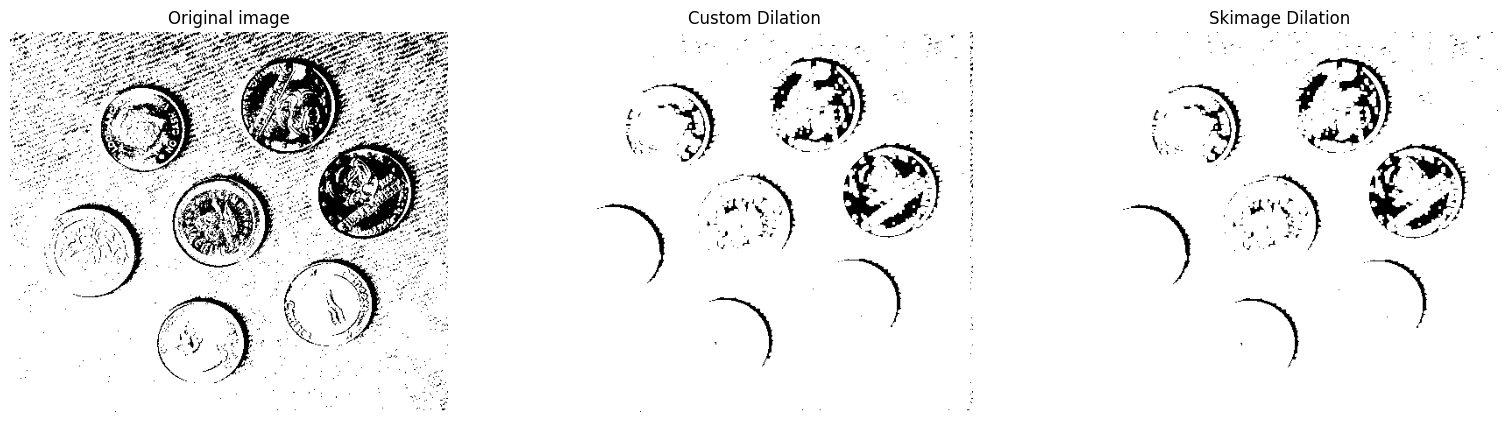

In [23]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

def custom_erosion(binary_img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    ROWS, COLS = binary_img.shape
    if (kernel.shape[0] != kernel.shape[1]) or (kernel.shape[0] % 2 == 0):
        return None
    kernel_size = kernel.shape[0]
    eroded_img = np.zeros((ROWS + 2, COLS + 2), dtype=np.uint8)
    eroded_img[1:-1, 1:-1] = binary_img.copy()
    for row in range(1, ROWS - kernel_size + 1):
        for col in range(1, COLS - kernel_size + 1):
            eroded_img[row, col] = np.min(binary_img[row - 1:row + kernel_size - 1, col - 1:col + kernel_size - 1] * kernel)
    return eroded_img[1:-1, 1:-1]

def custom_dilation(binary_img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    ROWS, COLS = binary_img.shape
    if (kernel.shape[0] != kernel.shape[1]) or (kernel.shape[0] % 2 == 0):
        return None
    kernel_size = kernel.shape[0]
    dilated_img = np.zeros((ROWS + 2, COLS + 2), dtype=np.uint8)
    dilated_img[1:-1, 1:-1] = binary_img.copy()
    for row in range(1, ROWS - kernel_size + 1):
        for col in range(1, COLS - kernel_size + 1):
            dilated_img[row, col] = np.max(binary_img[row - 1:row + kernel_size - 1, col - 1:col + kernel_size - 1] * kernel)
    return dilated_img[1:-1, 1:-1]

binary_img = io.imread("img/coins.jpg", as_gray=True) * 255
threshold = 120
binary_img = binary_img > threshold
kernel = np.ones((3, 3), dtype=np.uint8)

custom_eroded_binary_img = custom_erosion(binary_img, kernel)
eroded_binary_img = binary_erosion(binary_img, footprint=kernel)
show_images([binary_img, custom_eroded_binary_img, eroded_binary_img], ["Original image", "Custom Erosion", "Skimage Erosion"])

custom_dilated_binary_img = custom_dilation(binary_img, kernel)
dilated_binary_img = binary_dilation(binary_img, footprint=kernel)
show_images([binary_img, custom_dilated_binary_img, dilated_binary_img], ["Original image", "Custom Dilation", "Skimage Dilation"])

In [4]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img_gray.shape)
    img_with_boxes[rr, cc] = 1 #set color white

NameError: name 'bounding_boxes' is not defined

In [ ]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
